In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [32]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [33]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [34]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [35]:
# Training the Autoencoder on MNIST
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [36]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

print "BEFORE Flatenning, the shape was - ",x_train.shape

BEFORE Flatenning, the shape was -  (60000, 28, 28)


In [57]:
# Normalizing Values between 0 & 1 (28X28 images are flatened to a vector of size (784,))
# Converting the training data to values between 0 & 1.
x_train = x_train.astype('float32')/255.
# print "x_train.astype",x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
# The x_train data is reshaped to a 60000 X 784 matrix.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print len(x_train)
print x_train.shape[1:]

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print len(x_test)
print x_test.shape[1:]

print "After flatenning, the x_train shape is -",x_train.shape
print "After flatenning, the x_test shape is -",x_test.shape



60000
(784,)
10000
(784,)
After flatenning, the x_train shape is - (60000, 784)
After flatenning, the x_test shape is - (10000, 784)


In [44]:
# Training the autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, nb_epoch = 50, batch_size = 256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s - loss: 0.3904 - val_loss: 0.2736
Epoch 2/50
60000/60000 [==============================] - 6s - loss: 0.2668 - val_loss: 0.2570
Epoch 3/50
60000/60000 [==============================] - 7s - loss: 0.2475 - val_loss: 0.2356
Epoch 4/50
60000/60000 [==============================] - 9s - loss: 0.2279 - val_loss: 0.2174
Epoch 5/50
60000/60000 [==============================] - 9s - loss: 0.2119 - val_loss: 0.2036
Epoch 6/50
60000/60000 [==============================] - 7s - loss: 0.2003 - val_loss: 0.1939
Epoch 7/50
60000/60000 [==============================] - 7s - loss: 0.1918 - val_loss: 0.1865
Epoch 8/50
60000/60000 [==============================] - 7s - loss: 0.1849 - val_loss: 0.1801
Epoch 9/50
60000/60000 [==============================] - 7s - loss: 0.1790 - val_loss: 0.1746
Epoch 10/50
60000/60000 [==============================] - 8s - loss: 0.1737 - val_loss: 0.1696

In [45]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

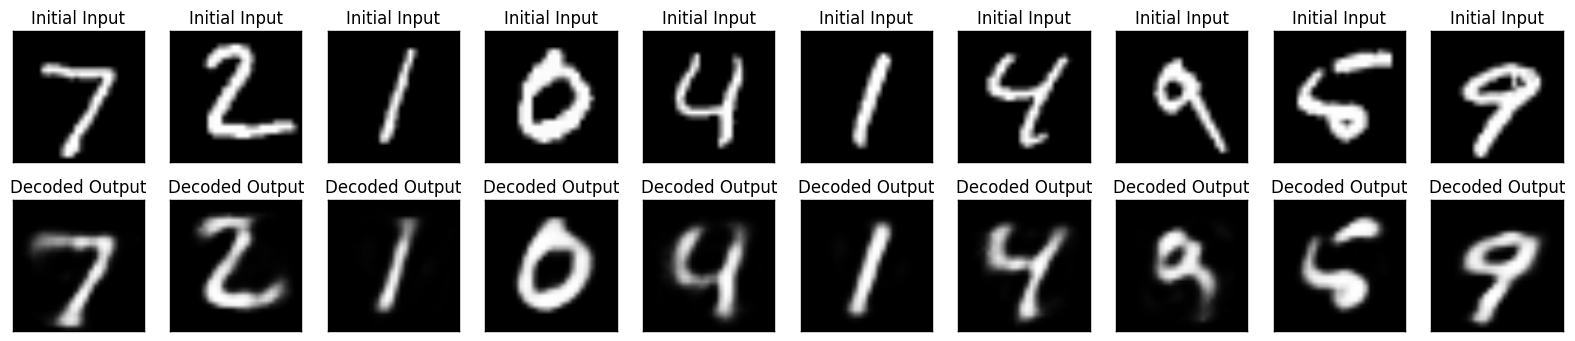

In [49]:
import matplotlib.pyplot as plt

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title("Initial Input")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title("Decoded Output")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()